To learn more about this project, I made the following modeling.

Build a random graph model to simulate students' social network, adding different types of nodes (smokers, users of alternative nicotine products, non-smokers, etc.) and edges to represent social relationships.

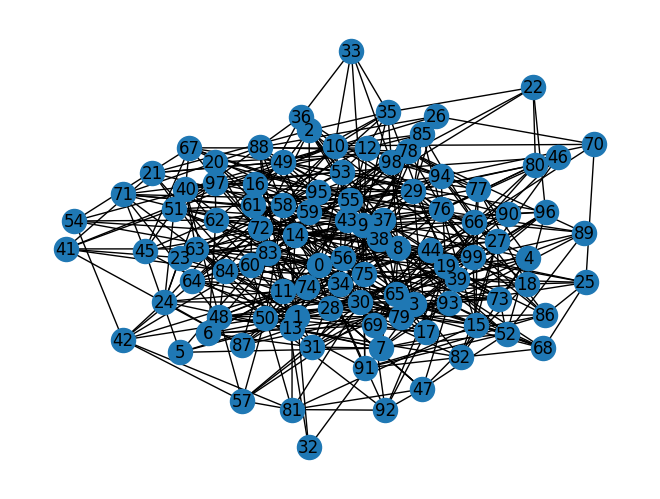

In [4]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add different types of nodes
node_types = ['smoker', 'alternative_user', 'non_somker']
num_students = 100

for i in range(num_students):
    node_type = random.choice(node_types)
    G.add_node(i, type=node_type)

# Add edges to represent social relationships
for i in range(num_students):
    for j in range(i+1, num_students):
        if random.random() < 0.1:  # Connect two nodes with a certain probability
            G.add_edge(i, j)

# Visualize
nx.draw(G, with_labels=True)
plt.show()

The diffusion of "healthy behavior adoption" is added to the network based on the infectious disease model, and the probabilistic spread through network edges is considered. Propagation under different network topologies can be studied.

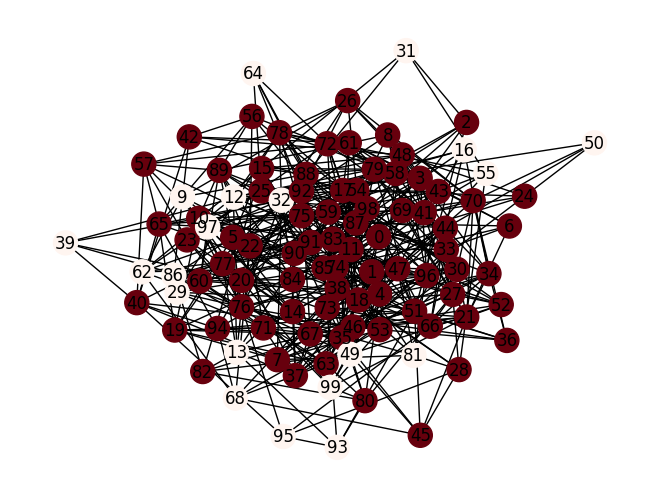

In [5]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.erdos_renyi_graph(100, 0.1)  # Use random graph model as an example, other topologies can also be used

#Add node attributes
node_types = ['smoker', 'alternative_user', 'non_somker']
for node in G.nodes:
    G.nodes[node]['type'] = random.choice(node_types)
    G.nodes[node]['health_behavior'] = 'no_adopt'  # The initial status is not adopted

# Add edges to represent social relationships
for edge in G.edges:
    G.edges[edge]['transmission_probability'] = random.uniform(0.1, 0.3)  # Set edge propagation probability

# Simulate the propagation process
initial_infected = random.choice(list(G.nodes))
G.nodes[initial_infected]['health_behavior'] = 'adopt'  # The initial infected node adopts healthy behavior

infected_nodes = [initial_infected]
newly_infected = [initial_infected]

while len(newly_infected) > 0:
    next_infected = []
    for node in newly_infected:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if G.nodes[neighbor]['health_behavior'] == 'no_adopt' and random.random() < G.edges[(node, neighbor)]['transmission_probability']:
                G.nodes[neighbor]['health_behavior'] = 'adopt'
                next_infected.append(neighbor)
    infected_nodes.extend(next_infected)
    newly_infected = next_infected

# Visualize
pos = nx.spring_layout(G)
node_color = [1 if G.nodes[node]['health_behavior'] == 'adopt' else 0 for node in G.nodes]
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Reds, with_labels=True)
plt.show()

Simulate online social interactions, allowing for influence and status changes between nodes. How online interactions can accelerate or inhibit transmission can be studied.

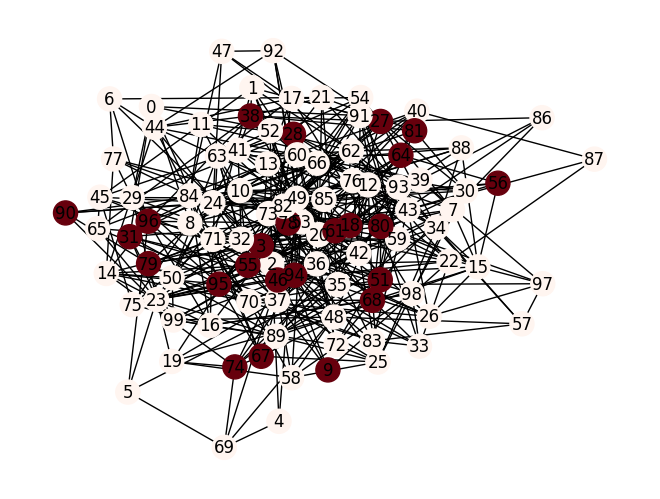

In [7]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.erdos_renyi_graph(100, 0.1)

# Add node attributes
node_types = ['smoker', 'alternative_user', 'non_somker']
for node in G.nodes:
    G.nodes[node]['type'] = random.choice(node_types)
    G.nodes[node]['online_interaction'] = random.uniform(0, 1)  # Degree of online interaction, ranging from 0 to 1
    G.nodes[node]['health_behavior'] = 'no_adopt'  # The initial status is not adopted

# Add edges to represent social relationships
for edge in G.edges:
    G.edges[edge]['transmission_probability'] = random.uniform(0.1, 0.3)  # Set edge propagation probability

# Simulate the propagation process
initial_infected = random.choice(list(G.nodes))
G.nodes[initial_infected]['health_behavior'] = 'adopt' 

infected_nodes = [initial_infected]
newly_infected = [initial_infected]

while len(newly_infected) > 0:
    next_infected = []
    for node in newly_infected:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            influence = G.nodes[neighbor]['online_interaction']  # The degree of online interaction affects communication
            if G.nodes[neighbor]['health_behavior'] == 'no_adopt' and random.random() < G.edges[(node, neighbor)]['transmission_probability'] * influence:
                G.nodes[neighbor]['health_behavior'] = 'adopt'
                next_infected.append(neighbor)
    infected_nodes.extend(next_infected)
    newly_infected = next_infected

# Visualize
pos = nx.spring_layout(G)
node_color = [1 if G.nodes[node]['health_behavior'] == 'adopt' else 0 for node in G.nodes]
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Reds, with_labels=True)
plt.show()

Use indicators in network science such as centrality, component analysis, etc. to identify "influential nodes" in the network. This can guide targeted network interventions.

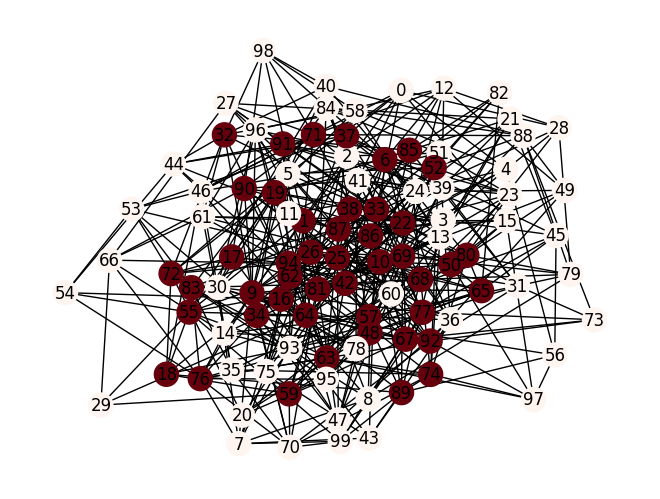

In [8]:
import random
import matplotlib.pyplot as plt
import networkx as nx

G = nx.erdos_renyi_graph(100, 0.1) 

node_types = ['smoker', 'alternative_user', 'non_somker']
for node in G.nodes:
    G.nodes[node]['type'] = random.choice(node_types)
    G.nodes[node]['online_interaction'] = random.uniform(0, 1) 
    G.nodes[node]['health_behavior'] = 'no_adopt'  

for edge in G.edges:
    G.edges[edge]['transmission_probability'] = random.uniform(0.1, 0.3) 

# Calculate the centrality index of the node
centrality = nx.degree_centrality(G)  # Using degree centrality as an example, you can also use other centrality metrics

# Identify influencing nodes
influential_nodes = [node for node, centrality_score in centrality.items() if centrality_score > 0.1]  # Take degree centrality greater than 0.1 as an example

# Intervene on the affected nodes
for node in influential_nodes:
    G.nodes[node]['health_behavior'] = 'adopt' 

initial_infected = random.choice(list(G.nodes))
G.nodes[initial_infected]['health_behavior'] = 'adopt' 

infected_nodes = [initial_infected]
newly_infected = [initial_infected]

while len(newly_infected) > 0:
    next_infected = []
    for node in newly_infected:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            influence = G.nodes[neighbor]['online_interaction']  
            if G.nodes[neighbor]['health_behavior'] == 'no_adopt' and random.random() < G.edges[(node, neighbor)]['transmission_probability'] * influence:
                G.nodes[neighbor]['health_behavior'] = 'adopt'
                next_infected.append(neighbor)
    infected_nodes.extend(next_infected)
    newly_infected = next_infected

# Visualize
pos = nx.spring_layout(G)
node_color = [1 if G.nodes[node]['health_behavior'] == 'adopt' else 0 for node in G.nodes]
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Reds, with_labels=True)
plt.show()

A series of simulations were conducted to compare the effectiveness of online interventions across different target populations and strategies. For example, intervention targeting nodes with high degree centrality in the network versus random nodes.

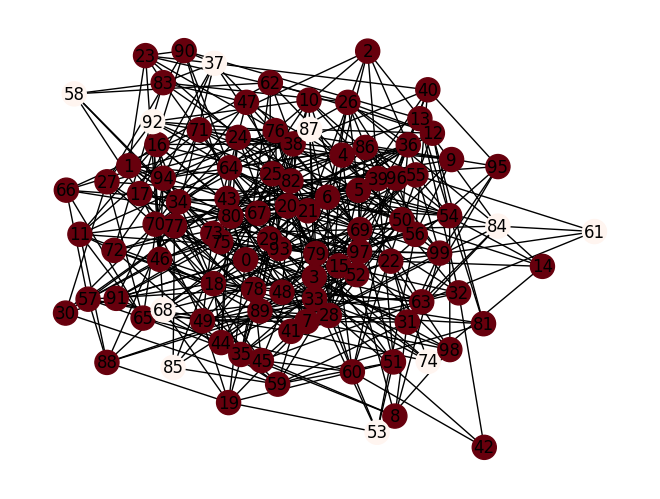

度中心性高的影响节点列表： [3, 6, 7, 18, 73, 99, [...]]
随机选择的影响节点列表： [[54, 12, 26, 88, 70, 66, 40, 13, 48, 33], [1, 63, 40, 5, 23, 51, 32, 71, 82, 72], [86, 56, 94, 88, 31, 27, 4, 39, 76, 75], [91, 49, 96, 40, 38, 90, 52, 88, 34, 39], [50, 14, 57, 0, 22, 95, 64, 78, 29, 96], [66, 2, 17, 50, 47, 80, 21, 67, 22, 30], [30, 81, 29, 36, 69, 77, 42, 28, 21, 46], [17, 1, 90, 16, 62, 71, 28, 24, 19, 93], [62, 7, 72, 52, 12, 43, 64, 86, 59, 19], [59, 41, 69, 83, 8, 72, 9, 19, 63, 98]]


In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx

G = nx.erdos_renyi_graph(100, 0.1)  

node_types = ['smoker', 'alternative_user', 'non_somker']
for node in G.nodes:
    G.nodes[node]['type'] = random.choice(node_types)
    G.nodes[node]['online_interaction'] = random.uniform(0, 1)  
    G.nodes[node]['health_behavior'] = 'no_adopt'  

for edge in G.edges:
    G.edges[edge]['transmission_probability'] = random.uniform(0.1, 0.3) 

# Perform a series of simulations
num_simulations = 10  #Number of simulations
influential_nodes_degree = []  # Store a list of influencing nodes with high degree centrality
influential_nodes_random = []  # Stores a list of randomly selected influencing nodes
for i in range(num_simulations):
    # Identify the influence nodes of different target groups
    if i % 2 == 0:
        target_nodes = [node for node, centrality_score in nx.degree_centrality(G).items() if centrality_score > 0.1]  # Select nodes with degree centrality higher than 0.1 as the target population
    else:
        target_nodes = random.sample(list(G.nodes), int(0.1 * len(G.nodes)))  # Randomly select 10% of the nodes as the target population

    # Calculate the centrality index of the node
    centrality = nx.degree_centrality(G)  

    # Identify influencing nodes
    influential_nodes_degree = [node for node, centrality_score in centrality.items() if node in target_nodes and centrality_score > 0.1]  # Take degree centrality greater than 0.1 as an example

    # Intervene on the affected nodes
    for node in influential_nodes_degree:
        G.nodes[node]['health_behavior'] = 'adopt'  # Set the health behavior status of the affected node to adopted

    initial_infected = random.choice(list(G.nodes))
    G.nodes[initial_infected]['health_behavior'] = 'adopt'  
    infected_nodes = [initial_infected]
    newly_infected = [initial_infected]
    
    while len(newly_infected) > 0:
        next_infected = []
        for node in newly_infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                influence = G.nodes[neighbor]['online_interaction']  
                if G.nodes[neighbor]['health_behavior'] == 'no_adopt' and random.random() < G.edges[(node, neighbor)]['transmission_probability'] * influence:
                    G.nodes[neighbor]['health_behavior'] = 'adopt'
                    next_infected.append(neighbor)
        infected_nodes.extend(next_infected)
        newly_infected = next_infected

    # Record affected nodes
    influential_nodes_degree.append(influential_nodes_degree)

    # Randomly select affected nodes
    random_influential_nodes = random.sample(list(G.nodes), int(0.1 * len(G.nodes)))  # Randomly select 10% of the nodes as influencing nodes
    G.nodes[node]['health_behavior'] = 'adopt'  # Set the health behavior status of a randomly selected node to Adopted
    influential_nodes_random.append(random_influential_nodes)

# Visualize
pos = nx.spring_layout(G)
node_color = [1 if G.nodes[node]['health_behavior'] == 'adopt' else 0 for node in G.nodes]
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Reds, with_labels=True)
plt.show()

# Output statistics of affected nodes
print("度中心性高的影响节点列表：", influential_nodes_degree)
print("随机选择的影响节点列表：", influential_nodes_random)

In the example above, I ran a series of simulations comparing an intervention targeting nodes with high degree centrality in the network versus random nodes. A list of influencing nodes in each simulation was recorded for subsequent comparison and analysis. Subsequently, the selection strategy of the target population can be modified as needed, and influencing nodes can be identified based on different centrality indicators for more in-depth research and comparison.

To allow the model to better fit real-world data and perform statistical analysis and draw conclusions, consider the following modifications:

1. Multiple sets of simulation parameter settings: Try different parameter settings such as propagation probability, network topology, and target population selection strategies to cover simulations of different scenarios in the real world.

2. Record the results: In each simulation, record the list of affected nodes, node status changes during the propagation process, propagation paths and other information to facilitate subsequent statistical analysis and conclusion inference.

3. Statistical analysis: Use statistical methods to analyze the simulation results, such as calculating the average number of affected nodes, propagation speed, propagation range and other indicators, and perform hypothesis testing, variance analysis and other statistical methods to verify the fitting degree of the model. and the reliability of the conclusions.

4. Draw conclusions: Based on the results of statistical analysis, draw conclusions about the effects of different network intervention strategies, such as which strategy is more effective for specific network topology and target groups, and the impact on different transmission probability scenarios, etc.